# Conditional mutual information between successive letters in written English

Author: J. Lizier, Isabelle De Backer, 2022-; based on the original Matlab tutorials.

The following block aims to import all the relevant libraries to analyse data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Specifics required for the text processing here:
import string
import re

# Preparing your environment

As per `Module_2_notebook.ipynb` etc. we need to use the functions we have defined in our previous work in other notebooks. So gather the new functions you wrote in this module into your `simpleinfotheory.py` script, and make sure it is referencable from here (you may need to change the folder referenced below) before you run the import line in the next cell:

In [2]:
# Option 3: edit simpleinfotheory.py and past your functions into that as you write them
import sys
sys.path.append('../../Module1-IntroToInfoTheory/PythonCode/completed/')
import simpleinfotheory

# 7. (Optional Extension) Conditional mutual information between successive letters in written English

In this extension activity, we will continue our analysis of written English extracted from the [Seinfeld](https://en.wikipedia.org/wiki/Seinfeld) scripts as begun in the previous modules.

1. Download the scripts from the links on Module 2 on Canvas, load into Python and preprocess as per steps 1-4 of the activity from module 2, such that we have the characters stored in the numpy array `processedStr`:<br/>
_Note:_ you may need to alter the filename/path to match your own --

In [3]:
filename = './Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    str = f.read()
p = re.compile('[!"#\$%&\'\(\)\*\+\,-\.\/:;<=>\?@\[\]\\\^_`{\|}~0-9]*');
processedStr = p.sub('', str); # Remove punctuation characters and digits
processedStr = ' '.join(processedStr.split('\n')); # Replace newline characters with spaces
processedStr = processedStr.lower(); # Convert all upper case into lower case
processedStr = np.array(list(processedStr)); # Finally convert this into a numpy array so we can work with it
np.unique(processedStr)

array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype='<U1')

2. We previously computed the mutual information between characters over several lags between these characters. In particular, we examined the mutual information between characters separated by a lag of 2, and posed the question of whether the information carried by the earlier character about the later one is also included in the character in between them. Think about how you could investigate this question using conditional mutual information?
3. Calculate the mutual information between characters separated by another character, conditioned on the character in the middle. Use our function `simpleinfotheory.conditionalmutualinformationempirical()`.<br/>
    _Hint_: You should create vectors of samples for each of: the earlier character, the middle character, and the later character; and pass these through to the function. Recall that to select all but the last two items in a numpy array `x`, you can refer to `x[:-2]`, and similarly to select all but the first and last items in an array you can refer to `x[1:-1]`.

In [4]:
# Compute the mutual information between successive characters conditioned on the character in between:
simpleinfotheory.conditionalmutualinformationempirical(processedStr[:-2],processedStr[2:],processedStr[1:-1])

0.739076942492698

4. Compare this conditional mutual information to the mutual information between the two characters separated by another character as computed in the previous module (see the result for a lag of 2 on the sample plot in that activity). Is the conditional mutual information here larger or smaller than that? What does this tell us about the structure of the relationships in sequences of characters in English text?
5. _Challenge_: Can you compute such conditional mutual information over lags of up to 5 characters, conditioning on all intervening characters, and then plot these? Alternatively, you could compute the joint mutual information from sets of consecutive characters (up to 5 of them) to the next character. (How are these two quantities related?).<br/>
    Note that the calculations here will take _significantly_ longer than previous ones since we are dealing with higher and higher order multivariate spaces (not so long for a lag of 2, but ~1 minute for lag 5). What is the size of the probability space we are estimating once we are looking at a lag of 5 (i.e. 4 characters in between the previous and next)? Do you think we can properly estimate the joint probabilities here from the amount of data that we have?

cond MI over lag 1 is 0.7196

cond MI over lag 2 is 0.7391

cond MI over lag 3 is 0.5251

cond MI over lag 4 is 0.3197

cond MI over lag 5 is 0.2474



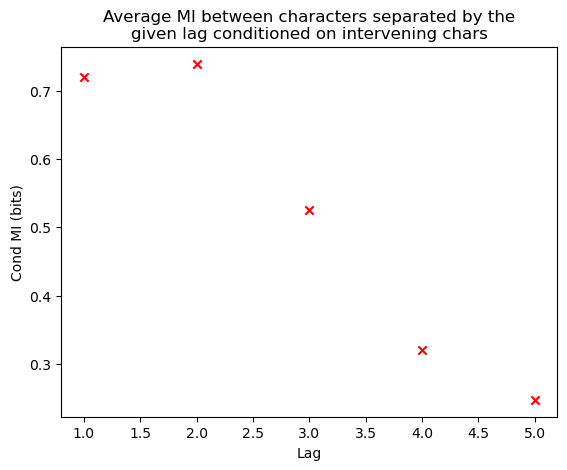

In [5]:
# Compute the mutual information between successive characters conditioned on up to 5 characters in between:
maxLag = 5;

condMisVsLag = np.zeros(maxLag);
conditionalCharacters = None;

nextChar = processedStr[maxLag:];
for lag in range(1,maxLag+1): # To go from 1 up to maxLag
    sourceChar = processedStr[maxLag-lag:-lag];
    if (lag == 1):
        # Nothing to condition on, just compute MI
        condMisVsLag[lag-1] = simpleinfotheory.mutualinformationempirical(sourceChar,nextChar)[0];
        conditionalCharacters = sourceChar; # Initialise the characters to now be conditioned on
    else:
        condMisVsLag[lag-1] = simpleinfotheory.conditionalmutualinformationempirical(sourceChar,nextChar,conditionalCharacters);
        conditionalCharacters = np.column_stack( (conditionalCharacters,sourceChar) ); # Add to the characters to be conditioned on
    print('cond MI over lag %d is %.4f\n' % (lag, condMisVsLag[lag-1]));

plt.scatter(range(1,maxLag+1), condMisVsLag, c="red", marker="x");
plt.xlabel('Lag')
plt.ylabel('Cond MI (bits)');
plt.title('Average MI between characters separated by the\ngiven lag conditioned on intervening chars');
plt.savefig('CondMIversusLag.png')